# Сравнение качества моделей
### Содержание

* [Подготовка данных](#1)
* [Сравнение моделей](#2)
    * [Теоретические основы](#21)
    * [Практическая реализация](#22)
* [Тестирование финальной модели](#3)


## Подготовка данных <a id="1"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("cleaned_dataset.csv", index_col=0)

Вначале нужно определить, на каких данных будет обучаться модель, а на каких тестироваться. **Традиционный подход** - это разделение исходного набора данных на 3 части (обучение, валидация и тестирование) с пропорции 60/20/20. В данном случае обучающая выборка используется для обучения модели, а валидация и тестирование для получения значения метрики без эффекта переобучения.

Однако существует и другой подход к разбиению данных - разделение на 2 части (обучение и тестирование) по правилу 80-20 (80% тренировочный, 20% тестовый). Зачастую данный метод применяется в тех случаях, когда отсутствует достаточное количество данных как в обучающем, так и в проверочном наборе.  

Перед тем как начать разбивать данные необходимо выделить из исходного набора данных целевую переменную (столбец `DRK_YN`) и сохранить её в отдельную переменную. Ниже приведён код разделения:

In [2]:
x = df.drop(columns=["DRK_YN"], axis=1)
y = df["DRK_YN"]

В ходе выполнения данной работы будет использован подход с разделением исходной выборки на 2 части с пропорцией 80-20, поскольку данный способ является самым популярным способом разбиения данных. Для того, чтобы разбить данные таким образом, существует специальный метод `train_test_split` в библиотеке `scikit-learn`.

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

## Сравнение моделей <a id="2"></a>

### Теоретические основы <a id="21"></a>

После того, как модели были обучены, их необходимо оценить при помощи имеющихся метрик оценки. Всего для задач классификации существует множество оценок. Но все они строятся на основе **матрицы ошибок** (*Confusion Matrix*).

Confusion matrix состоит из 4 основных исходов бинарной классификации: *истинно положительных* (**TP**), *ложно положительных* (**FP**), *истнно отрицательных* (**TN**) и *ложно отрицательных* (**FN**). 

Пусть какой-то набор медицинских данных характерен для данного диагноза. Если наша модель верно определила и поставила положительный класс, тогда это *истинно положительный* исход, если же модель ставит отрицательную метку класса, тогда это *ложно отрицательный* исход. В случае отсутствия диагноза у рассматриваемого набора данных исходы модели остаются аналогичными. Тогда, если модель относит запись к классу положительному, то мы говорим о *ложно положительном* исходе (здоровому человеку ошибочно поставлен диагноз "болен"), и наоборот, если модель определяет запись как отрицательный класс, то от *истинно отрицательный* исход (больному человеку поставлен диагноз "болен").

Одной из наиболее простых метрик, построенных на основе матрицы ошибок является **полнота** (*Recall*). Полнота определяет долю верных прогнозов среди всех данных с положительным классом. Она определяется отношением истинно положительных результатов к общему количеству положительных результатов. Таким образом формула выглядит следующим образом:
$$ Recall = \frac{TP}{TP+FN} $$
В исходной задачи необходимо уделить данной задаче некоторое внимание, поскольку в задаче ошибка нераспознания положительного класса высока.

Однако одна полнота не способна в полной мере оценить точность классификации. Поэтому вместе с ней применяют и другую метрику - **точность** (*Precision*), которая измеряет, насколько хорошо модель справляется с ложно положительными результатами. Более формально, точность принимает в расчет только те точки данных, которые были помечены как положительные, и определяет, сколько среди них истинно положительные. Формула для подсчета данного значения выглядит следующим образом:
$$Precision = \frac{TP}{TP+FP}$$
Данная оценка также является важной, поскольку в рамках данной задачи "цена" ложно положительного класса также высока.

Далее, поскольку ранее было выяснено, что метрики **полнота** и **точность** имеют равную высокую значимость, то лучше всего использовать **F-меру** (*F-score*), которая является средним гармоническим между первой и второй метриками. Почему при этом используется именно среднее гармоническое, а не среднее арифметическое? Потому что если одна метрика очень большая, например 100%, а другая наоборот крайне низкая (50%), то среднее арифметическое будет равняться 75%, что является приемлемым результатом. Однако в реальность такой классификатор имеет крайне низкую точность классификации. Таким образом, формула для подсчета выглядит так:
$$F_1 = \frac{2 \cdot precision \cdot recall}{precision+recall}$$
Если обе метрики большие, то и итоговый результат также высокий. Цель F1-меры состоит в том, чтобы определить, является ли высокой как полнота, так и точность.

Однако иногда требуется, чтобы либо полнота, либо точность превалировала одна над другой. Таким образом, может потребоваться при вычислении F-меры придать одной из них больший вес. Как раз для этого и была придумана $F_\beta$-мера, формула которой представлена ниже:
$$F_\beta = \frac{(1+\beta^2) \cdot precision \cdot recall}{\beta^2 \cdot precision + recall}$$
В данной формуле параметр $\beta$ может принимать любое положительное значение и обозначает уровень значимости одного из критериев. Чем ниже $\beta$, тем более весомой становится точность, а чем выше $\beta$, тем важнее становится полнота.

Из ранее рассмотренных метрик становится очевидно, что существует два типа ошибок: ложно положительные и ложно отрицательные. И существует метрика, которая основана на двух данных ошибках - **кривая рабочей характеристики приемника** (*ROC*). Данная кривая строится на основе двух показателей: **избирательности** (*False Positive Rate (FPR)*) и **полноте** (*True Positive Rate (TPR)*). Данные показатели высчитываются по следующим формулам:
$$ FPR = \frac{FP}{FP + TN} $$
$$ TPR = \frac{TP}{TP + TN} $$
И далее, на основе данных двух метрик строится ROC-кривая, где по горизонтали откладывается FPR, а по вертикали - TPR. Однако сама по себе ROC-кривая может лишь графически показать, какая модель лучше справляется с классификацией. Для того, чтобы сравнить две модели численно, необходимо найти **площадь под ROC-кривой** (*Area Under Curve ROC (AUC ROC)*). Диапазон значений AUC ROC равен $[0.5, 1]$, где чем ближе к 1, тем лучше модель для классификации данных.

### Практическая реализация <a id="22"></a>

Перед началом оценки всех моделей создадим функцию для оценки модели. На вход данной функции подаётся обученная модель классификатора и тестовый набор данных (`x_test` и `y_test`). Данная функция в качестве результата выведет на экран матрицу неточностей классификатора (*Confusion Matrix*) и ROC-кривую, а под рисунками будут показаны результаты основных метрик оценивания. Код разработанной функции представлен ниже:

In [4]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

def evaluate_model(model, x_test, y_test, model_name: str) -> None:
    print('Получение предсказаний...')
    pred_proba = model.predict(x_test)
    xs = np.linspace(0, 1, 50)
    a = ['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']
    color = np.random.choice(a)
    print('Построение графиков...')
    with plt.xkcd():
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
        ConfusionMatrixDisplay.from_predictions(y_test, pred_proba, ax=ax1, cmap=color).ax_.set_title(f'Confusion matrix of {model_name}')
        RocCurveDisplay.from_predictions(y_test, pred_proba, ax=ax2, color='black').ax_.set_title(f'ROC Curve of {model_name}')
        ax2.plot(xs, xs)

    plt.show()
    vals = f'''Оценивание модели {model_name} по параметрам:
    Полнота (Recall): {recall_score(y_test, pred_proba):.4f},
    Точность (Precision): {precision_score(y_test, pred_proba):.4f},
    F1-мера (F1-score): {f1_score(y_test, pred_proba):.4f},
    Площадь под ROC-кривой (AUC ROC): {roc_auc_score(y_test, pred_proba):.4f}'''
    print(vals)

Далее создадим классификационные модели на основе полученных ранее оптимальных параметров при кросс-валидации. Сперва импортируем все необходимые компоненты:

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Далее создадим функцию, благодаря которой будет создан классификатор на основе введённого в неё алгоритма. На вход данная функция будет получать алгоритм классификации с введёнными в него параметрами, а на выходе будет получаться полностью обученные классификатор. Программный код разработанной функции представлен ниже:

In [6]:
def create_model(alg, alg_name, x_train, y_train):
    print("Обучение модели...")
    # Создаем стандартизатор
    standardizer = StandardScaler()

    # Создаём конвейер
    pipe = Pipeline([("standardizer", standardizer), (alg_name, alg)])

    clf = pipe.fit(x_train, y_train)
    print("Обучение завершено!")
    return clf


Далее определим словарь, в котором ключем будет являться название метода классификации, а значением - сам метод классификации.

In [7]:
# Для стака моделей
estimators = [
    ('forest', RandomForestClassifier(n_jobs=-1, n_estimators=793, random_state=42, max_depth=14, max_features=12, min_samples_leaf=17)),
    ('lr', LogisticRegression(solver='saga', n_jobs=-1, C=1.6, l1_ratio=0.60, penalty="elasticnet"))
]

algs = {
    'k-nearest neighbors': KNeighborsClassifier(n_jobs=-1, metric='manhattan', n_neighbors=14),
    'support vector machine': LinearSVC(max_iter=10000, C=1.5, loss="squared_hinge", tol=0.005001),
    'logistic regression': LogisticRegression(solver="saga", n_jobs=-1, C=4.972235551967773, l1_ratio=0.00387986251009187, penalty='elasticnet'),
    'decision tree': DecisionTreeClassifier(min_samples_leaf=50, criterion='log_loss', max_depth=10, max_features=23),
    'random forest': RandomForestClassifier(n_jobs=-1, n_estimators=793, max_depth=12, max_features=12, min_samples_leaf=17),
    'adaptive boost': AdaBoostClassifier(learning_rate=0.5, n_estimators=159),
    'gradiend boost': XGBClassifier(random_state=42, colsample_bylevel=0.9452050650024018, colsample_bynode=1.0, colsample_bytree=1.0, gamma=5.966638612389175,
                                   learning_rate=0.08893704430415869, max_depth=17, reg_alpha=20.0, reg_lambda=0.0, subsample=1.0),
    'stacked model': StackingClassifier(estimators=estimators, final_estimator=DecisionTreeClassifier(min_samples_leaf=10)),
}

Далее в цикле пройдемся по всем элементам данного словаря и сперва создадим классификатор, а затем оценим его точность.

Работа с k-nearest neighbors
Обучение модели...
Обучение завершено!
Получение предсказаний...
Построение графиков...


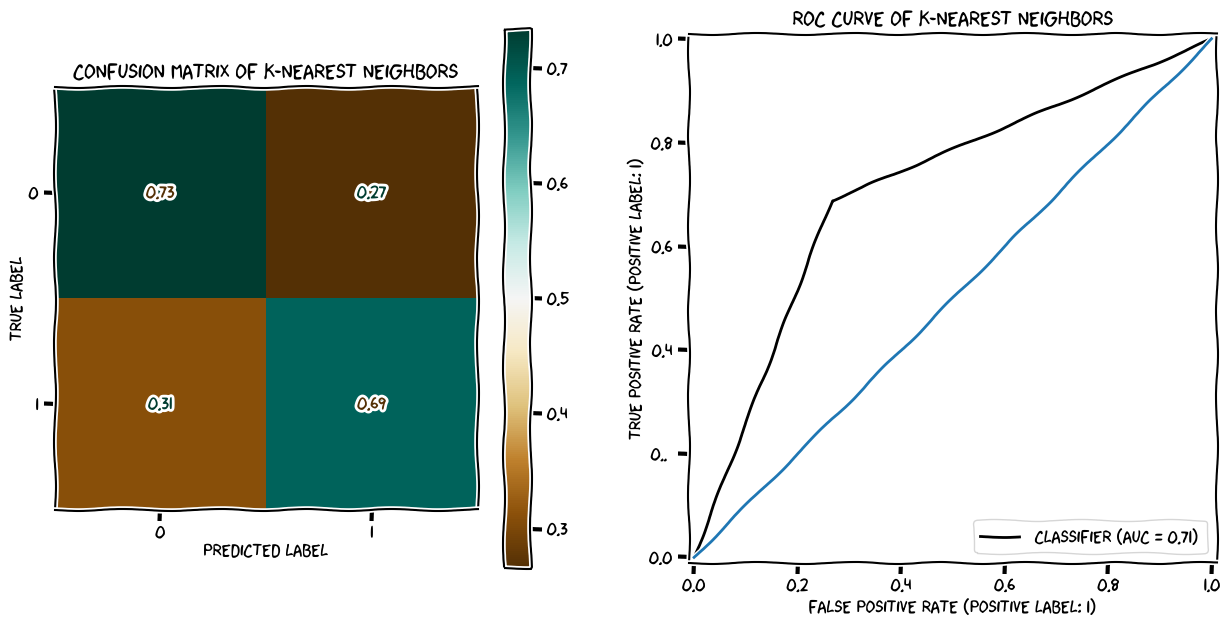

Оценивание модели k-nearest neighbors по параметрам:
    Полнота (Recall): 0.6890,
    Точность (Precision): 0.7212,
    F1-мера (F1-score): 0.7047,
    Площадь под ROC-кривой (AUC ROC): 0.7116
Работа с support vector machine
Обучение модели...


C:\Users\HomePC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\HomePC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Обучение завершено!
Получение предсказаний...
Построение графиков...


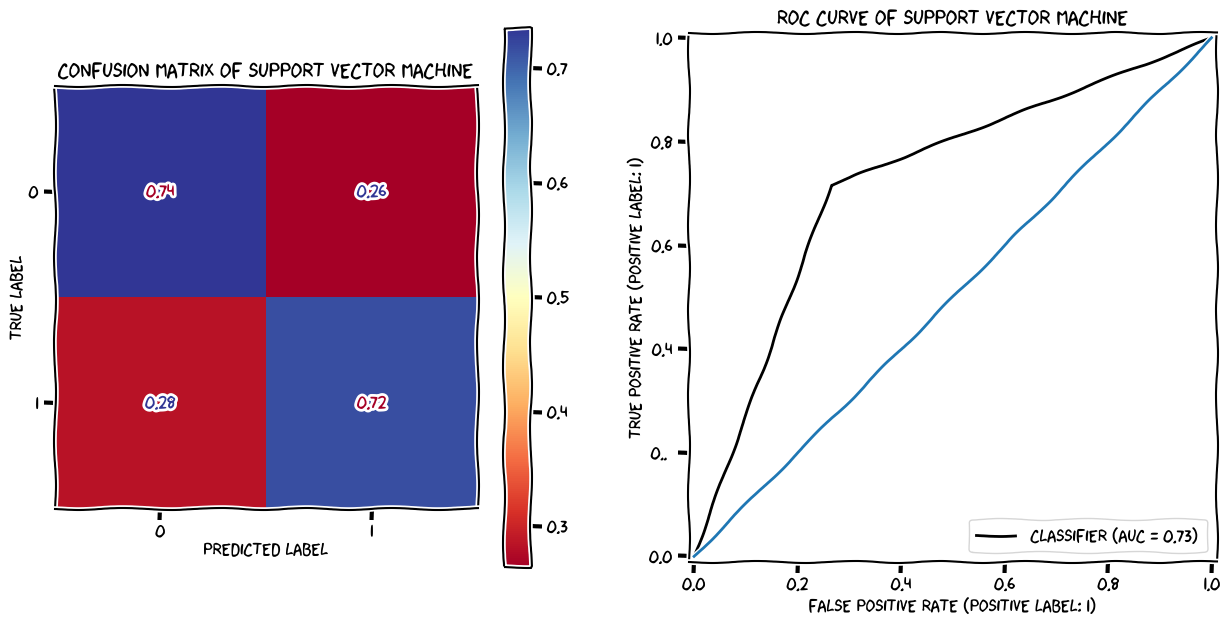

Оценивание модели support vector machine по параметрам:
    Полнота (Recall): 0.7169,
    Точность (Precision): 0.7300,
    F1-мера (F1-score): 0.7234,
    Площадь под ROC-кривой (AUC ROC): 0.7261
Работа с logistic regression
Обучение модели...
Обучение завершено!
Получение предсказаний...
Построение графиков...


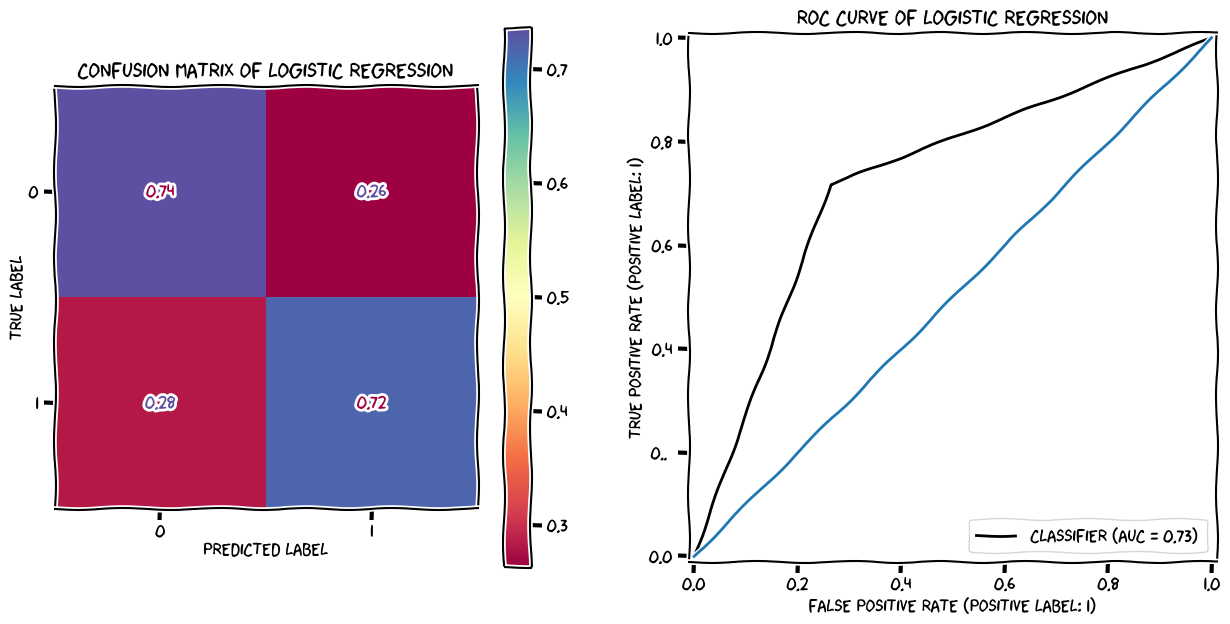

Оценивание модели logistic regression по параметрам:
    Полнота (Recall): 0.7180,
    Точность (Precision): 0.7311,
    F1-мера (F1-score): 0.7245,
    Площадь под ROC-кривой (AUC ROC): 0.7273
Работа с decision tree
Обучение модели...
Обучение завершено!
Получение предсказаний...
Построение графиков...


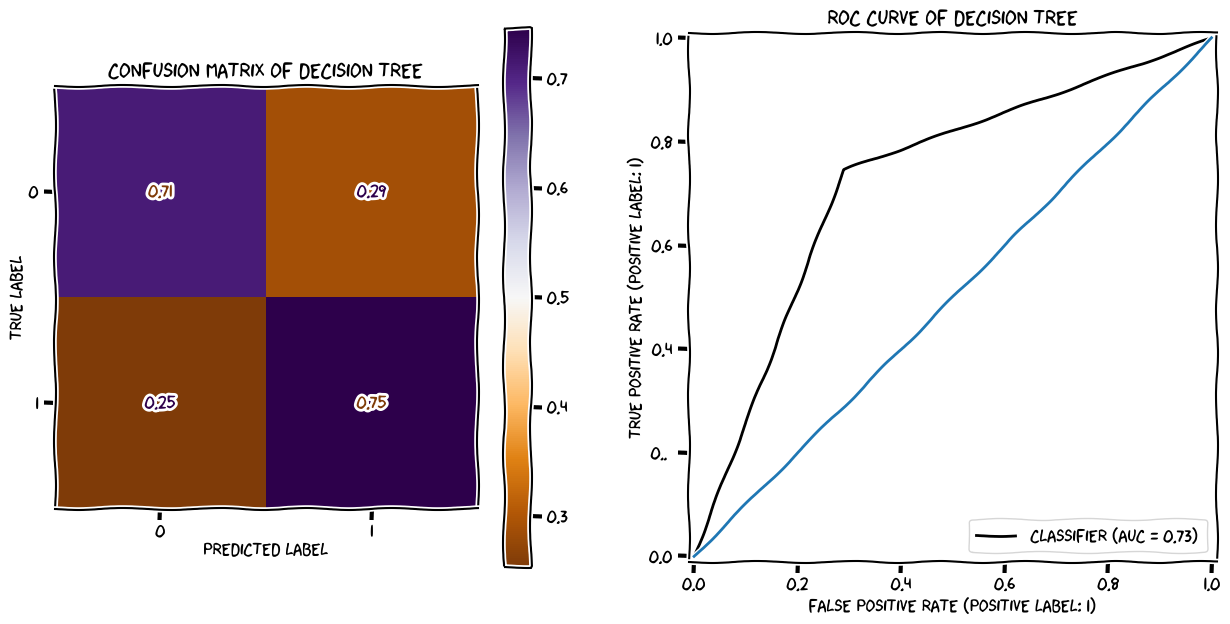

Оценивание модели decision tree по параметрам:
    Полнота (Recall): 0.7463,
    Точность (Precision): 0.7201,
    F1-мера (F1-score): 0.7330,
    Площадь под ROC-кривой (AUC ROC): 0.7285
Работа с random forest
Обучение модели...
Обучение завершено!
Получение предсказаний...
Построение графиков...


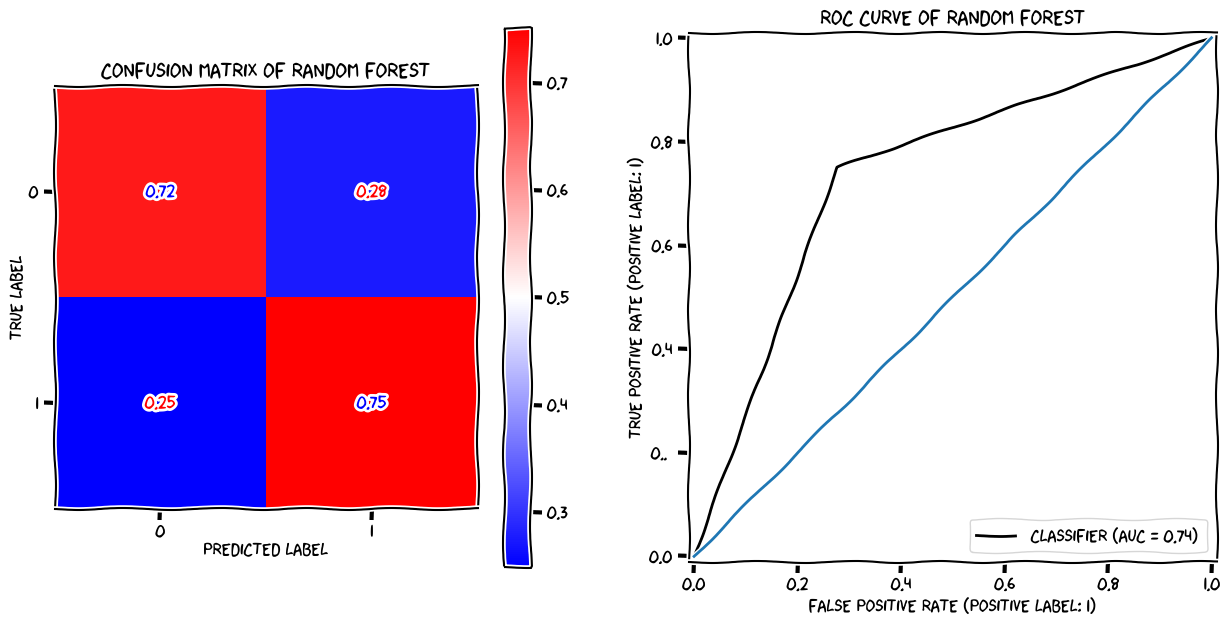

Оценивание модели random forest по параметрам:
    Полнота (Recall): 0.7510,
    Точность (Precision): 0.7305,
    F1-мера (F1-score): 0.7406,
    Площадь под ROC-кривой (AUC ROC): 0.7373
Работа с adaptive boost
Обучение модели...


C:\Users\HomePC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Обучение завершено!
Получение предсказаний...
Построение графиков...


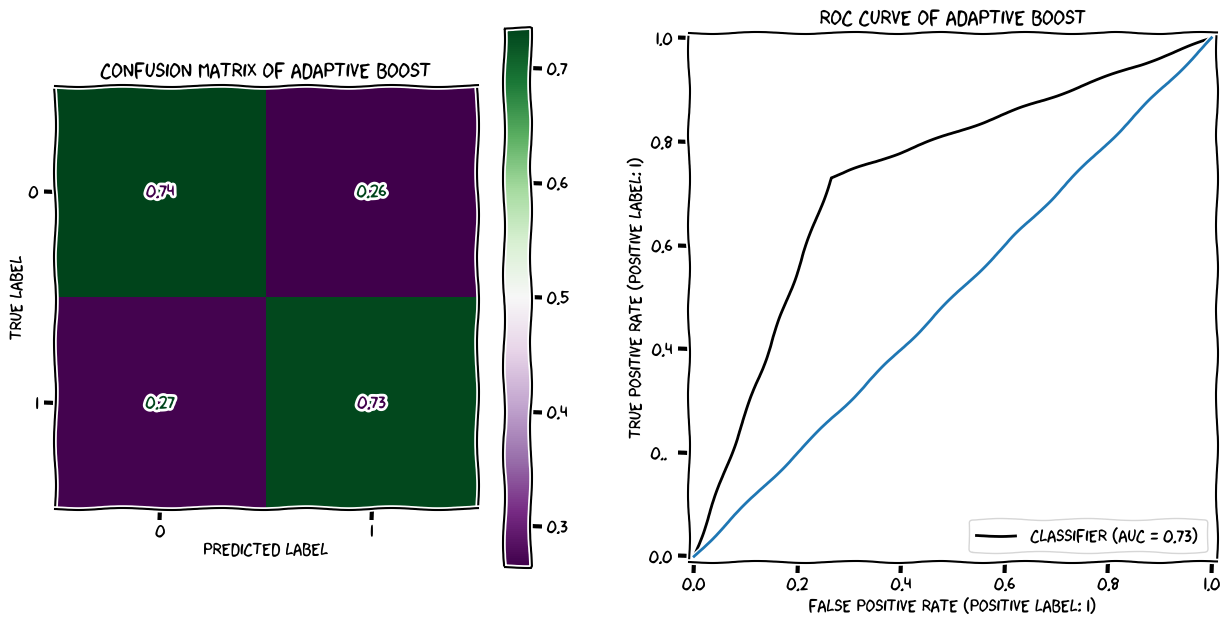

Оценивание модели adaptive boost по параметрам:
    Полнота (Recall): 0.7309,
    Точность (Precision): 0.7338,
    F1-мера (F1-score): 0.7323,
    Площадь под ROC-кривой (AUC ROC): 0.7332
Работа с gradiend boost
Обучение модели...
Обучение завершено!
Получение предсказаний...
Построение графиков...


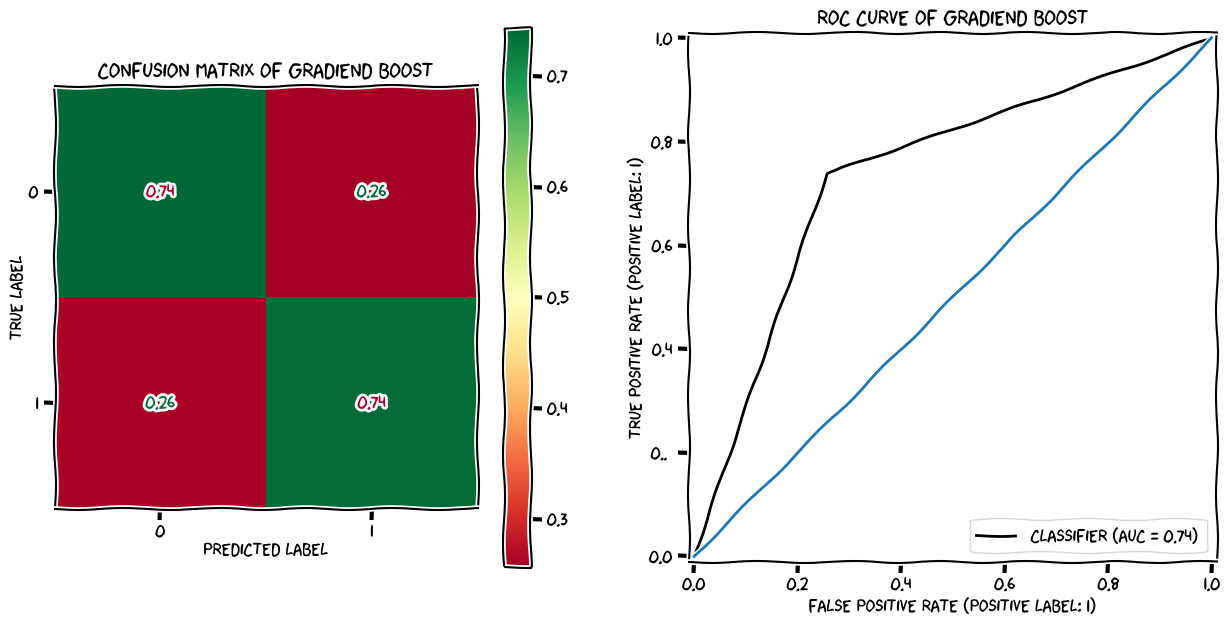

Оценивание модели gradiend boost по параметрам:
    Полнота (Recall): 0.7392,
    Точность (Precision): 0.7417,
    F1-мера (F1-score): 0.7405,
    Площадь под ROC-кривой (AUC ROC): 0.7412
Работа с stacked model
Обучение модели...
Обучение завершено!
Получение предсказаний...
Построение графиков...


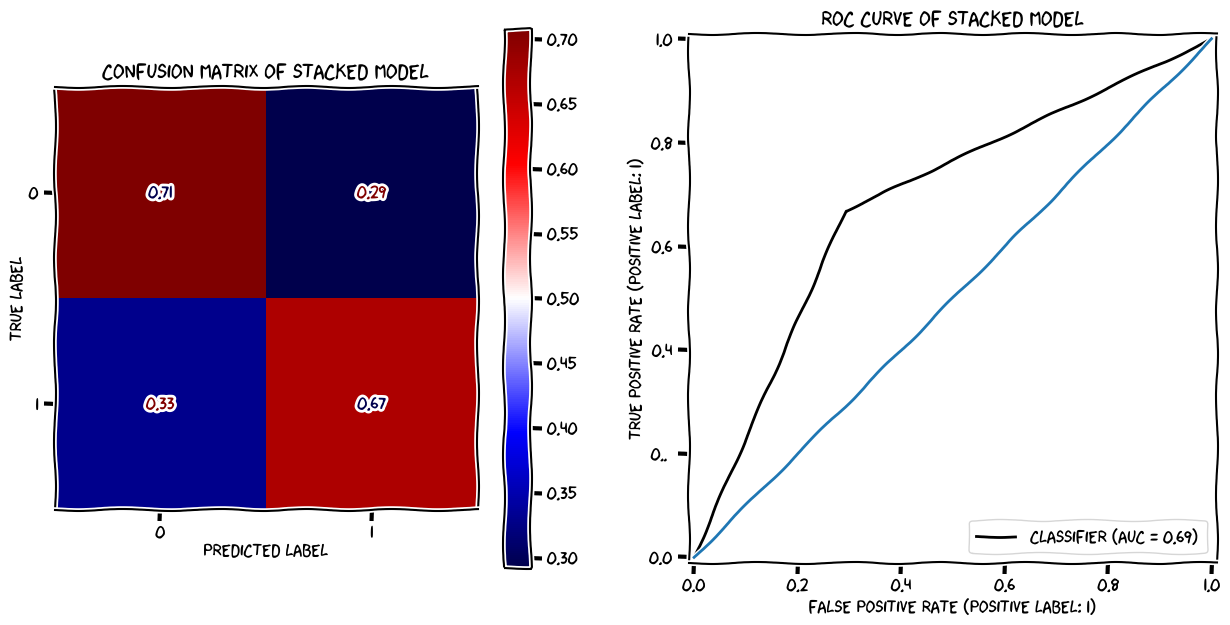

Оценивание модели stacked model по параметрам:
    Полнота (Recall): 0.6690,
    Точность (Precision): 0.6956,
    F1-мера (F1-score): 0.6821,
    Площадь под ROC-кривой (AUC ROC): 0.6885


In [9]:
import matplotlib.font_manager as fm
fm.fontManager.addfont(r"E:\Code\Шрифты\xkcd.ttf")
fm.fontManager.addfont(r"E:\Code\Шрифты\xkcd-script.ttf")
fm.fontManager.addfont(r"E:\Code\Шрифты\Comic_Neue\ComicNeue-Regular.ttf")
fm.fontManager.addfont(r"E:\Code\Шрифты\Humor Sans.ttf")
plt.rcParams['font.family'] = 'xkcd Script'


for name, alg in algs.items():
    print(f'Работа с {name}')
    clf = create_model(alg, name, x_train, y_train)
    evaluate_model(clf, x_test, y_test, name)


## Тестирование финальной модели <a id="3"></a>

В качестве вывода к предыдущему этапу было получено, что наилучшей точностью классификации обладает модель градиентного бустинга, со значением по метрике ROC AUC равной 0,7412. Поскольку лучший результат, который может быть получен метрикой AUC ROC = 1, а худший = 0.5 (классификатор работает на случайном угадывании), то точка 0,75 является ровно серединой между двумя крайностями. Однако полученная точность является достаточно средним показателем, который можно попробовать оптимизировать.

При оптимизации точности классификации могут применяться несколько основных шагов, такие как:
1) **Feature Engineering**: создание новых признаков, удаление ненужных, использование методов отбора признаков;
2) **Оптимизация гиперпараметров**: расширение диапазона параметров, использование оптимизированных методов подбора параметров;
3) **Ансамблирование моделей**;
4) **Балансировка классов**;
5) **Обработка данных**: нормализация и стандартизация, удаление пропусков, избавление от выбросов;
6) **Улучшение модели**: применение комплексных моделей, использование глубокого обучения;

Из приведённого выше списка в рамках данной работы остались не рассмотренными еще 2 способа: методы отбора признаков и методы глубокого обучения. И в качестве перспективы на будущее эти методы могут улучшить качество классификации, однако насколько это поможет - неизвестно.

Далее, перейдем к тестированию наилучшей модели - а именно попробуем на вход подать её данные 1 реального пациента и посмотрим, с какими вероятностями она классифицирует данного пациента по классам. Для этого снова создадим классификационную модель с использованием градиентного бустинга, как это представлено ниже.

In [8]:
clf = create_model(algs["gradiend boost"], 'gradiend boost', x_train, y_train)

Обучение модели...
Обучение завершено!


Далее создадим набор данный x_test, на котором будет происходить тестирование модели.

In [13]:
d = {
    "sex": 0,
    "age": 20,
    "height": 180,
    "weight": 75,
    "waistline": 91.0,
    "sight_left": 0.8,
    "sight_right": 0.8,
    "hear_left": 1,
    "hear_right": 1,
    "SBP": 128,
    "DBP": 75,
    "BLDS": 466,
    "tot_chole": 70,
    "HDL_chole": 18,
    "LDL_chole": 46,
    "triglyceride": 63,
    "hemoglobin": 15.1,
    "urine_protein": 4,
    "serum_creatinine": 0.89,
    "SGOT_AST": 19,
    "SGOT_ALT": 17,
    "gamma_GTP": 37,
    "SMK_stat_type_cd": 0,
}
real_test = pd.DataFrame(data=d, index=[0])
real_test

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
0,0,20,180,75,91.0,0.8,0.8,1,1,128,...,18,46,63,15.1,4,0.89,19,17,37,0


После обучения и создания тестового набора данных, получим предсказания от модели при помощи метода `predict_proba`, который вернет вероятности отнесения к каждому из классов. Получаем следующий результат:

In [14]:
print(f'Вероятности отнесения к каждому из классов: {clf.predict_proba(real_test)}')
print(f'Таким образом данные были отнесены к классу: {clf.predict(real_test)}')

Вероятности отнесения к каждому из классов: [[0.46488547 0.5351145 ]]
Таким образом данные были отнесены к классу: [1]


В данном случае 0 класс - выпивающие люди, а 1 - непьющие. Ответ, полученный моделью полностью совпал с реальным положением вещей, поскольку пациент действительно является непьющим.